## დავალება პირველი

In [2]:
import pandas as pd

file_path = "Earthquakes_database.csv"
data = pd.read_csv(file_path)

data.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
data_cleaned = data.dropna(axis=1, how='any')

data_cleaned[['Year', 'Month', 'Day']] = data_cleaned['Date'].str.split('/', expand=True)

data_cleaned.head()


/tmp/ipykernel_21813/2694311003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['Year', 'Month', 'Day']] = data_cleaned['Date'].str.split('/', expand=True)
/tmp/ipykernel_21813/2694311003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['Year', 'Month', 'Day']] = data_cleaned['Date'].str.split('/', expand=True)
/tmp/ipykernel_21813/2694311003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,2,1965
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,4,1965
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,5,1965
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,8,1965
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,9,1965


<br>

## დავალება 2

In [6]:
bins = [0, 5, 7, float('inf')]  # Adjust the bin ranges as needed
labels = ['Low Magnitude', 'Medium Magnitude', 'High Magnitude']

data['Magnitude Category'] = pd.cut(data['Magnitude'], bins=bins, labels=labels, right=False)

data[['Magnitude', 'Magnitude Category']].head()


,Magnitude,Magnitude Category
0,6.0,Medium Magnitude
1,5.8,Medium Magnitude
2,6.2,Medium Magnitude
3,5.8,Medium Magnitude
4,5.8,Medium Magnitude


<br>

## დავალება 3

In [13]:
melted_data = pd.melt(data, id_vars=['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude'],
                      var_name='AdditionalInfo', value_name='Value')

melted_data.head()


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,AdditionalInfo,Value
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,Depth Error,NaN
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,Depth Error,NaN
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,Depth Error,NaN
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,Depth Error,NaN
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,Depth Error,NaN


In [14]:
pivot_table_data = pd.pivot_table(data, values='Magnitude', index='Type', columns='Status', aggfunc='mean')

pivot_table_data.head()


Status,Automatic,Reviewed
Type,,
Earthquake,6.005616,5.867019
Explosion,NaN,5.850000
Nuclear Explosion,NaN,5.850686
Rock Burst,NaN,6.200000


## დავალება 4

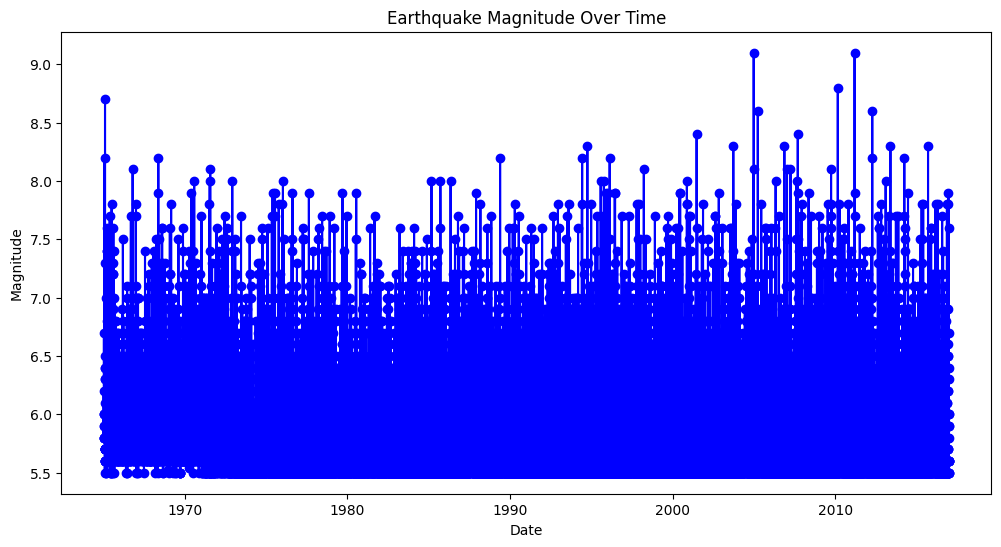

/tmp/ipykernel_21813/3895616329.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=data, palette='viridis')


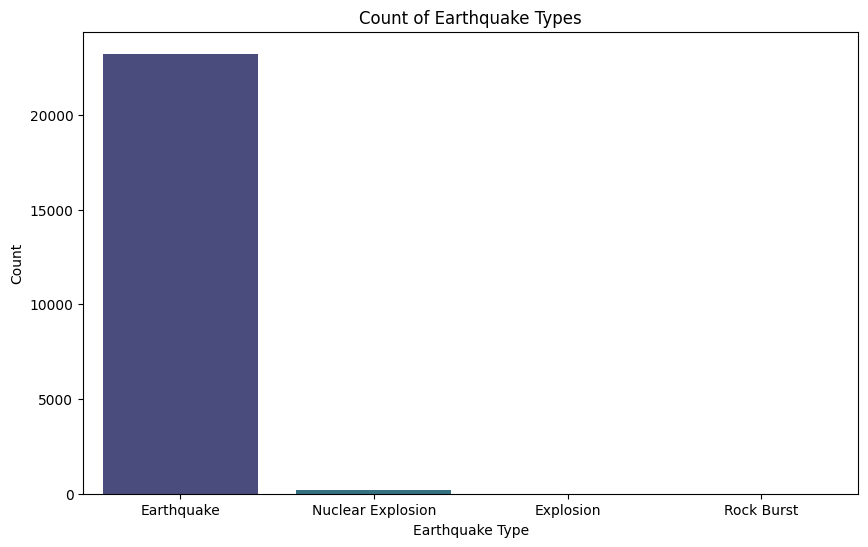

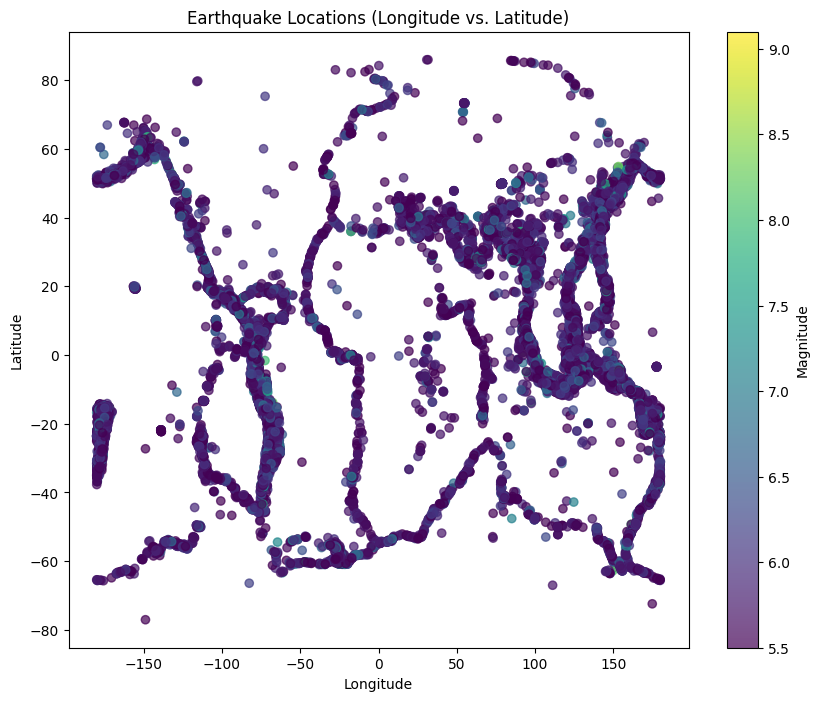

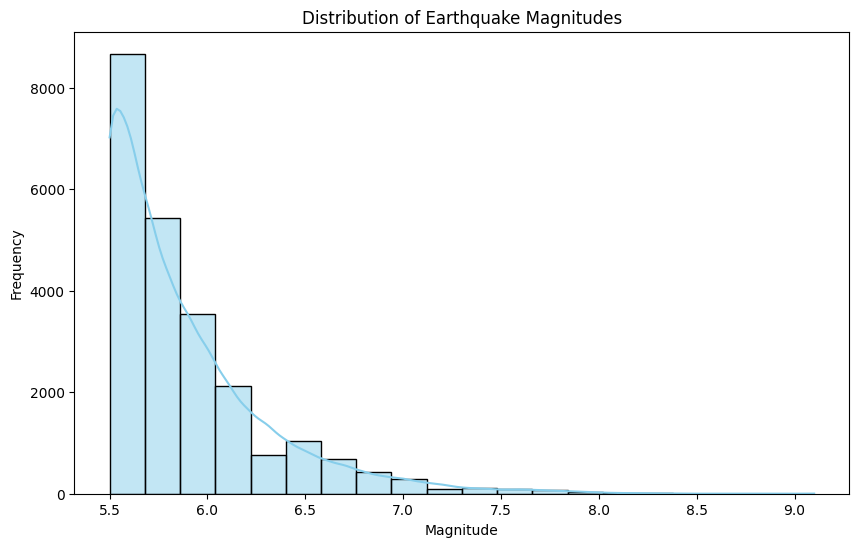

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

data.sort_values('Date', inplace=True)
plt.plot(data['Date'], data['Magnitude'], marker='o', linestyle='-', color='b')
plt.title('Earthquake Magnitude Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data, palette='viridis')
plt.title('Count of Earthquake Types')
plt.xlabel('Earthquake Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Magnitude'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Magnitude')
plt.title('Earthquake Locations (Longitude vs. Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Magnitude'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


## დავალება 5

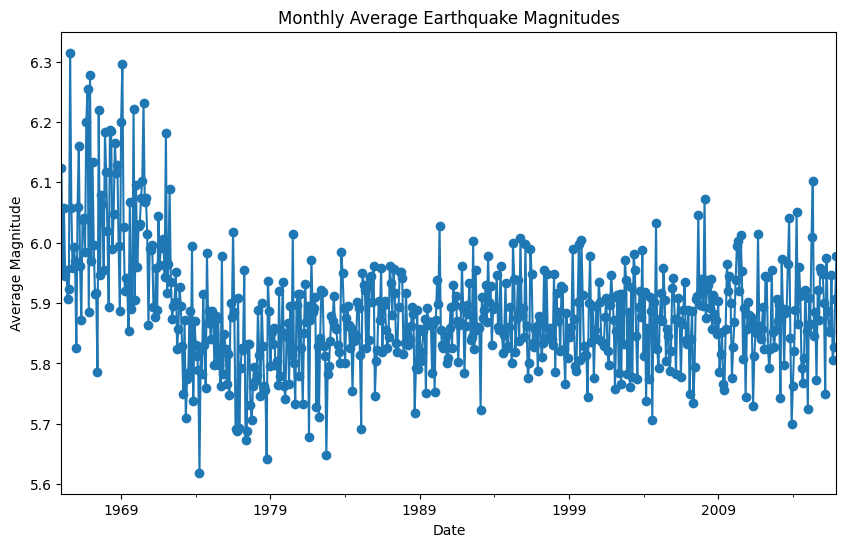

In [25]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()

data[['Date', 'Year', 'Month']].head()

monthly_average = data.resample('M', on='Date')['Magnitude'].mean()

plt.figure(figsize=(10, 6))
monthly_average.plot(marker='o')
plt.title('Monthly Average Earthquake Magnitudes')
plt.xlabel('Date')
plt.ylabel('Average Magnitude')
plt.show()
